In [1]:
!pip install wordcloud

C:\Users\Shiva\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


  Using cached wordcloud-1.8.1-cp37-cp37m-win_amd64.whl (154 kB)


In [2]:
!pwd

/c/Users/Shiva/OneDrive/Desktop/Documents/fintech_project_two/resource


In [3]:
import pandas as pd
df1=pd.read_pickle("test_df_tweet_btc.plk")
df1 =df1.rename(columns={"BTC price": "BTC_price", "Elon Musk tweet": "elon_text"})
df1

,BTC_price,elon_text
time,,
2020-12-02 04:00:00,18559.38,[]
2020-12-02 05:00:00,18664.77,[]
2020-12-02 06:00:00,18941.28,[]
2020-12-02 07:00:00,19127.00,[]
2020-12-02 08:00:00,19196.49,[]
...,...,...
2021-02-23 07:00:00,49640.13,[]
2021-02-23 08:00:00,46618.38,"[@PeterSchiff 🍆, @PPathole Super cool]"
2021-02-23 09:00:00,48046.76,[]


In [4]:
df1['elon_text'] = [','.join(i) if isinstance(i, list) else i for i in df1['elon_text']]

In [5]:
pd


<module 'pandas' from 'C:\\Users\\Shiva\\anaconda3\\envs\\alpacaenv\\lib\\site-packages\\pandas\\__init__.py'>

In [6]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
%matplotlib inline
from nltk.corpus import reuters, stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

In [8]:
# Create a list of stopwords
# YOUR CODE HERE
sw = set(stopwords.words('english'))

In [9]:
# Complete the tokenizer function
def tokenizer(elon_text):#text
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', elon_text) #text
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    #new addline
    sw_addon = {'erdayastronaut', 'next', 'high','amp','spacex','make','good','year','car','engine','tesla','wa','even','high','time',
               'flcnhvy','teslaownerssv','ppathole','way','dont','orbit','lauch','needed','much','point','lexfridman','probably'}
    #second_result = [word.lower() for word in words if word.lower() not in sw.union(sw_addon)]
                #This has to change
    # Convert the words to lowercase
    output = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]#this is new line
    #output = [word.lower() for word in lem if word.lower() not in sw]
    # Remove the stop words
    return output

In [10]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
df1['tokens'] = df1['elon_text'].apply(tokenizer) 
df1

,BTC_price,elon_text,tokens
time,,,
2020-12-02 04:00:00,18559.38,,[]
2020-12-02 05:00:00,18664.77,,[]
2020-12-02 06:00:00,18941.28,,[]
2020-12-02 07:00:00,19127.00,,[]
2020-12-02 08:00:00,19196.49,,[]
...,...,...,...
2021-02-23 07:00:00,49640.13,,[]
2021-02-23 08:00:00,46618.38,"@PeterSchiff 🍆,@PPathole Super cool","[peterschiff, super, cool]"
2021-02-23 09:00:00,48046.76,,[]


In [11]:
from collections import Counter
from nltk import ngrams

In [12]:

# Generate the Bitcoin word cloud
# YOUR CODE HERE!
corpus = df1["elon_text"]

def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)  # what is doc
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    #new addline
    sw_addon = {'erdayastronaut', 'next', 'high','amp','spacex','make','good','year','car','engine','tesla','wa','even','high','time',
               'flcnhvy','teslaownerssv','ppathole','way','dont','orbit','lauch','needed','much','point','lexfridman','probably'}
    #second_result = [word.lower() for word in words if word.lower() not in sw.union(sw_addon)]
                #This has to change
    # Convert the words to lowercase
    output = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]#this is new line
  
    #output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

In [13]:
big_string = ' '.join(corpus)
input_text = process_text(big_string)

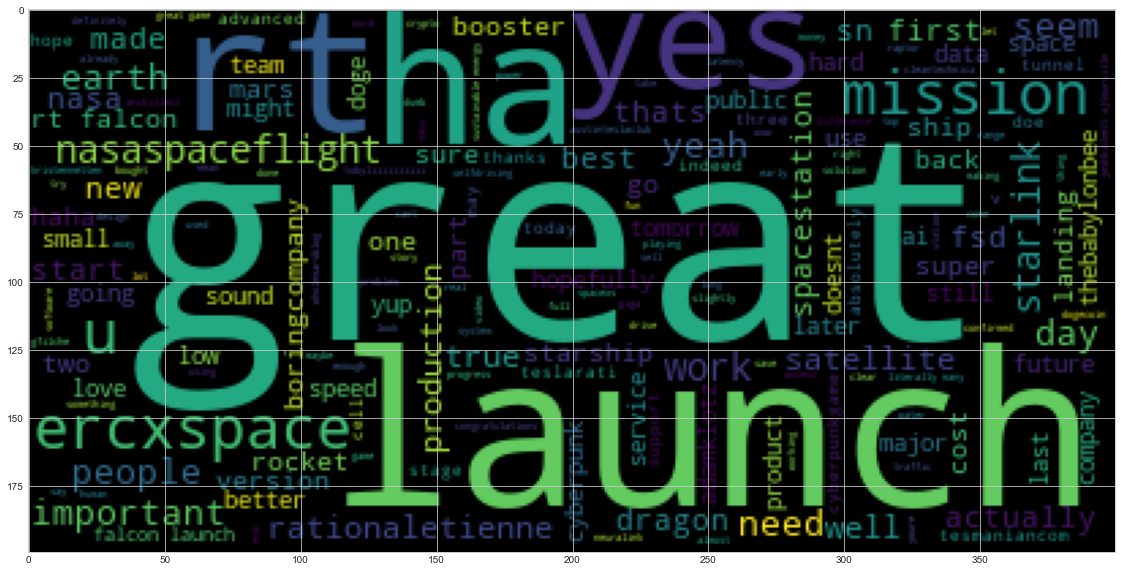

In [14]:
       
wc = WordCloud().generate(input_text)
plt.imshow(wc)

In [15]:
type(wc)

wordcloud.wordcloud.WordCloud

In [22]:

pn.extension()

In [25]:
import panel as pn
pn.Column(wc)

Column
    [0] Str(WordCloud)

In [34]:
#Historical price curve of the chosen stock/crypto- ST
import hvplot.pandas
historicplot=df1.hvplot()

In [35]:
historicplot

:Curve   [time]   (BTC_price)

In [36]:
pn.Column(historicplot)

Column
    [0] HoloViews(Curve)